In [1]:
import matplotlib.pyplot as plt #used to make the plots below
%matplotlib inline  
#makes them print in the jupyter notebook
import numpy as np          
import pandas as pd             #Use this for data loading and statistics
from collections import OrderedDict #use this sort sorting the dictionary 

In [2]:
#These are used in the graphing function below:
colors=["red","orange", "yellow","green","blue","purple","salmon","darkorange","c","seagreen","steelblue","violet","darkgray","brown"]
grade_key=["0.0","1.0","1.5","2.0","2.5","3.0","3.5","4.0"]

In [3]:
classes_FS01=pd.read_excel("61331_Classes_FS01-US16_part1.xlsx")       #reads the data file and saves it
classes_FS01_2=pd.read_excel("61331_Classes_FS01-US16_part2.xlsx") 

In [4]:
# add both parts together, Make sure they are 551,937 total before moving on!
classes_FS01.append(classes_FS01_2, ignore_index=True) 
#print(classes_FS01.head()) 

,placeholderID,term_seq_id,term_code,subj_code,crse_code,sctn_code,grade_code,repeat_status_flag,major
0,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1014,FS01,PHY,251,24.0,2.5,,3611 - Earth Science
1,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,MTH,126,5.0,3.0,SR,3611 - Earth Science
2,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,PHY,232,1.0,1.0,,3611 - Earth Science
3,97758DD4-7286-4A19-BA6C-00005FE6CFA3,1016,SS02,PHY,252,20.0,1.5,,3611 - Earth Science
4,592FB87B-B37F-476D-B7F0-0001F057D6A6,1014,FS01,MTH,110,8.0,2.0,,4494 - Social Work
5,9C41EAAC-FC57-42F9-B53F-000201BE35C3,1054,FS05,MTH,103,1.0,2.0,,1069 - General Business Admin-Prelaw
6,9C41EAAC-FC57-42F9-B53F-000201BE35C3,1056,SS06,MTH,124,3.0,2.5,,4380 - Political Science-Prelaw
7,7AED7EC2-ED7F-4FE1-8270-000209CBA389,1054,FS05,MTH,103,2.0,3.0,,5151 - No Preference
8,7AED7EC2-ED7F-4FE1-8270-000209CBA389,1064,FS06,MTH,124,27.0,2.0,,3969 - Human Biology
9,7AED7EC2-ED7F-4FE1-8270-000209CBA389,1076,SS08,PHY,231C,730.0,2.5,,3969 - Human Biology


In [5]:
#This splits the classes by the type of classes in the data set
lb=classes_FS01[classes_FS01.subj_code=="LB"]
lbs=classes_FS01[classes_FS01.subj_code=="LBS"]
mth=classes_FS01[classes_FS01.subj_code=="MTH"]
phy=classes_FS01[classes_FS01.subj_code=="PHY"]


unique_term = np.unique(classes_FS01["term_code"]) #makes a list of the unique values in the set
print("Term Codes") 
print(unique_term)

unique_phy= np.unique(phy["crse_code"]) #makes a list of the unique values in the set
counts_phy = {}                            #empty dictionary to add and count our values
    

for uniq in unique_phy:
    counts_phy[uniq] = list(phy["crse_code"]).count(uniq) #counts up the number of unique values that we found above

print("Usable Physics Class Codes")
print(unique_phy)

unique_mth = np.unique(mth["crse_code"]) #makes a list of the unique values in the set
counts_mth = {}                            #empty dictionary to add and count our values
    
for uniq in unique_mth:
    counts_mth[uniq] = list(mth["crse_code"]).count(uniq) #counts up the number of unique values that we found above

print("Usable Math Class Codes")
print(unique_mth)

unique_lb = np.unique(lb["crse_code"]) #makes a list of the unique values in the set
counts_lb = {}                            #empty dictionary to add and count our values

for uniq in unique_lb:
    counts_lb[uniq] = list(lb["crse_code"]).count(uniq) #counts up the number of unique values that we found above

print("Usable Lyman Briggs College Class Codes")
print(unique_lb)

unique_lbs = np.unique(lbs["crse_code"]) #makes a list of the unique values in the set
counts_lbs = {}                            #empty dictionary to add and count our values

for uniq in unique_lbs:
    counts_lbs[uniq] = list(lbs["crse_code"]).count(uniq) #counts up the number of unique values that we found above

print("Usable Lyman Briggs School Class Codes")
print(unique_lbs)

Term Codes
['FS01' 'FS02' 'FS03' 'FS04' 'FS05' 'FS06' 'FS07' 'FS08' 'FS09' 'FS10'
 'FS11' 'FS12' 'FS13' 'FS14' 'FS15' 'FS16' 'SS02' 'SS03' 'SS04' 'SS05'
 'SS06' 'SS07' 'SS08' 'SS09' 'SS10' 'SS11' 'SS12' 'SS13' 'SS14' 'SS15'
 'SS16' 'US01' 'US02' 'US03' 'US04' 'US05' 'US06' 'US07' 'US08' 'US09'
 'US10' 'US11' 'US12' 'US13' 'US14' 'US15' 'US16']
Usable Physics Class Codes
['101' '102' '170' '181B' '182B' '183' '183A' '183B' '184' '184A' '184B'
 '191' '192' '193H' '201' '205' '213H' '215' '215B' '231' '231B' '231C'
 '232' '232B' '232C' '233B' '234B' '251' '252' '294H' '305' '321' '351B'
 '357B' '390' '405' '410' '415' '422' '425B' '431' '440' '451' '471' '472'
 '480' '481' '482' '490' '491' '492' '493' '810' '820' '831' '832' '841'
 '851' '852' '853' '855' '861' '871' '891' '905' '912' '913' '955' '959'
 '962' '963' '971' '973' 'GCG' 'GCU']
Usable Math Class Codes
['1005' '100E' '101' '102' '103' '103E' '106' '106E' '110' '110E' '112'
 '114' '116' '116E' '124' '124E' '126' '132' '132E' '1

In [6]:
#creates the function that will be used down below
def graphing_grades (subject,term,course,title_name):
    sbjt=classes_FS01[classes_FS01.subj_code==subject]
    term_sort=sbjt[sbjt.term_code==term]
    crse_sort=term_sort[term_sort.crse_code==course]
    unique = np.unique(crse_sort["grade_code"]) #makes a list of the unique values in the set
    counts = {}                            #empty dictionary to add and count our values
    
    for uniq in unique:
        counts[uniq] = list(crse_sort["grade_code"]).count(uniq) #counts up the number of unique values that we found above
        for word in counts:
            counts=OrderedDict(counts)         #this will order the dictionary to show numbers first then letters in alphabetical  order
    

    #plt.figure(figsize=(10,6)) #make the figure a certain size
    plt.bar(range(len(counts)), counts.values(),width=0.5)
    plt.xticks(range(len(counts)), counts.keys())
    plt.title(title_name)                                  #makes it so you can import the name when calling the function
    plt.xlabel("Grade")
    plt.ylabel("Counts")
    plt.show()
    
    print(counts) #This will print the dictonary in order to show what the pie graph is repressenting 
    
    labels = counts.keys() #takes the dictionary and saves just the "title" of the counts
    counts_overall = counts.values() #takes the dictionary and saves just the counts of the variables
    explode=np.repeat(.1,len(list(labels))) #this is used to expand the graph to be able to see the size of it
    
    #plt.figure(figsize=(10,10)) #Make the figure larger
    plt.pie(list(counts_overall),labels=list(labels),autopct='%1.1f%%',shadow=True,colors=colors,explode=explode)
    plt.title(title_name)
    plt.tight_layout()
    plt.legend(loc="best",bbox_to_anchor=(1.2, 1))
    plt.show()
    

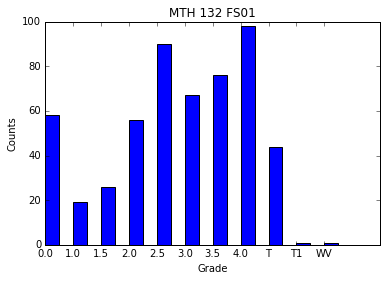

OrderedDict([('0.0', 58), ('1.0', 19), ('1.5', 26), ('2.0', 56), ('2.5', 90), ('3.0', 67), ('3.5', 76), ('4.0', 98), ('T', 44), ('T1', 1), ('WV', 1)])


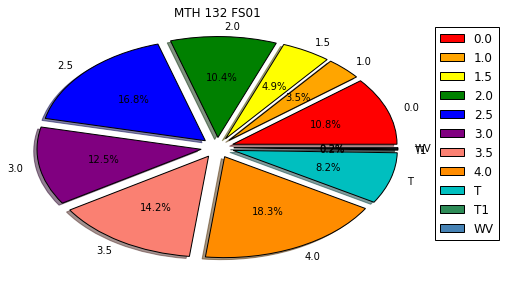

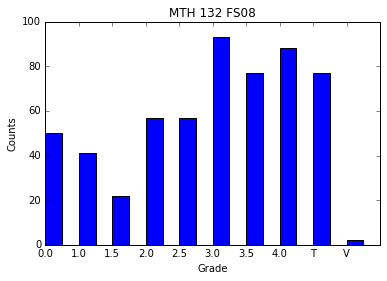

OrderedDict([('0.0', 50), ('1.0', 41), ('1.5', 22), ('2.0', 57), ('2.5', 57), ('3.0', 93), ('3.5', 77), ('4.0', 88), ('T', 77), ('V', 2)])


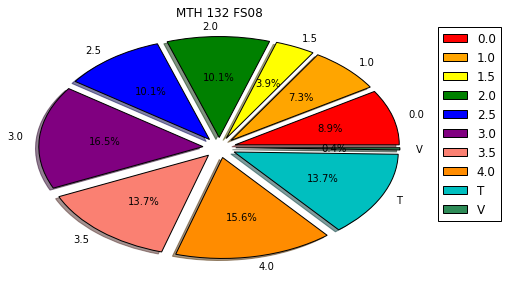

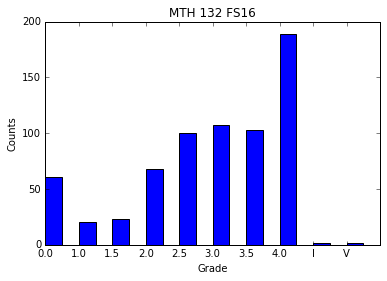

OrderedDict([('0.0', 61), ('1.0', 20), ('1.5', 23), ('2.0', 68), ('2.5', 100), ('3.0', 107), ('3.5', 103), ('4.0', 189), ('I', 2), ('V', 2)])


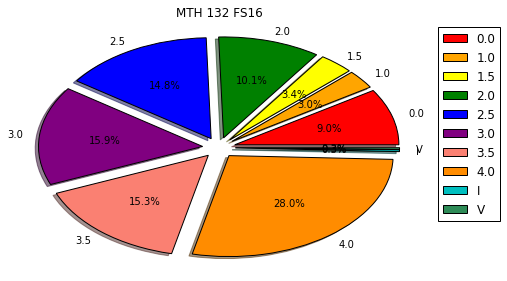

In [7]:
graphing_grades("MTH","FS01","132","MTH 132 FS01")
graphing_grades("MTH","FS08","132","MTH 132 FS08")
graphing_grades("MTH","FS16","132","MTH 132 FS16")

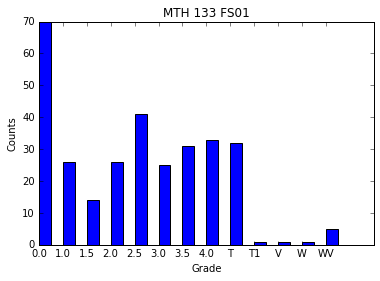

OrderedDict([('0.0', 70), ('1.0', 26), ('1.5', 14), ('2.0', 26), ('2.5', 41), ('3.0', 25), ('3.5', 31), ('4.0', 33), ('T', 32), ('T1', 1), ('V', 1), ('W', 1), ('WV', 5)])


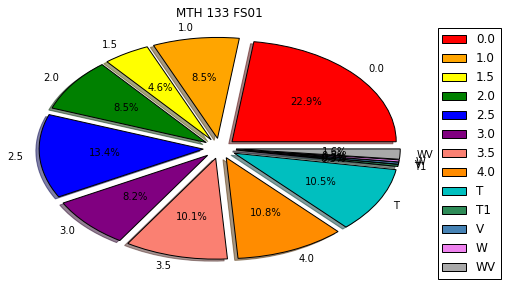

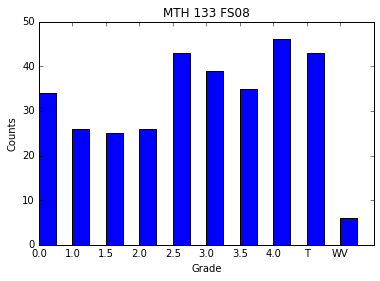

OrderedDict([('0.0', 34), ('1.0', 26), ('1.5', 25), ('2.0', 26), ('2.5', 43), ('3.0', 39), ('3.5', 35), ('4.0', 46), ('T', 43), ('WV', 6)])


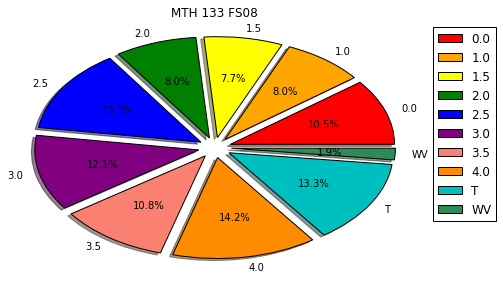

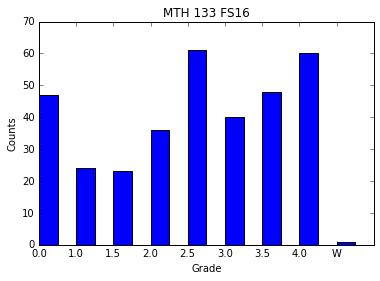

OrderedDict([('0.0', 47), ('1.0', 24), ('1.5', 23), ('2.0', 36), ('2.5', 61), ('3.0', 40), ('3.5', 48), ('4.0', 60), ('W', 1)])


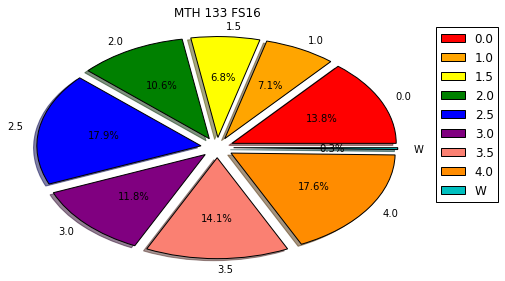

In [8]:
graphing_grades("MTH","FS01","133","MTH 133 FS01")
graphing_grades("MTH","FS08","133","MTH 133 FS08")
graphing_grades("MTH","FS16","133","MTH 133 FS16")

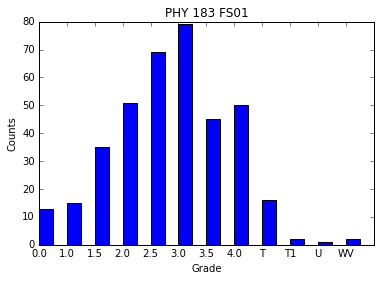

OrderedDict([('0.0', 13), ('1.0', 15), ('1.5', 35), ('2.0', 51), ('2.5', 69), ('3.0', 79), ('3.5', 45), ('4.0', 50), ('T', 16), ('T1', 2), ('U', 1), ('WV', 2)])


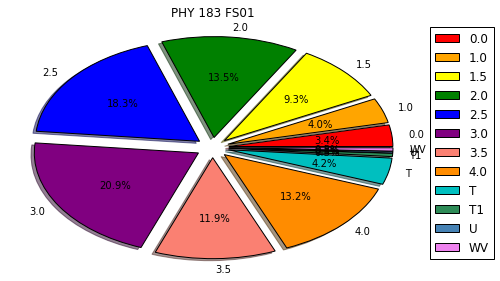

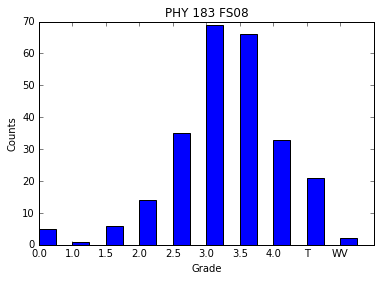

OrderedDict([('0.0', 5), ('1.0', 1), ('1.5', 6), ('2.0', 14), ('2.5', 35), ('3.0', 69), ('3.5', 66), ('4.0', 33), ('T', 21), ('WV', 2)])


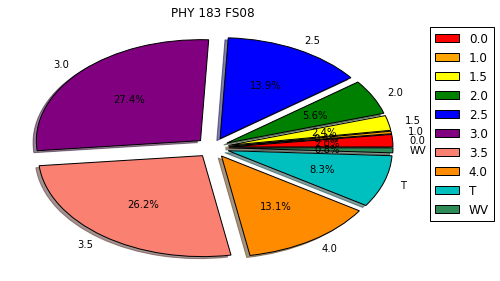

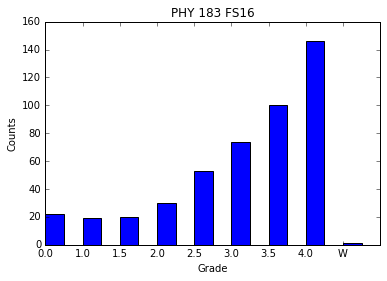

OrderedDict([('0.0', 22), ('1.0', 19), ('1.5', 20), ('2.0', 30), ('2.5', 53), ('3.0', 74), ('3.5', 100), ('4.0', 146), ('W', 1)])


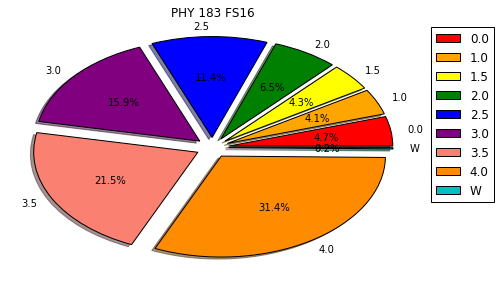

In [9]:
graphing_grades("PHY","FS01","183","PHY 183 FS01")
graphing_grades("PHY","FS08","183","PHY 183 FS08")
graphing_grades("PHY","FS16","183","PHY 183 FS16")

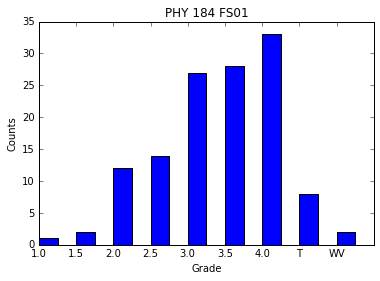

OrderedDict([('1.0', 1), ('1.5', 2), ('2.0', 12), ('2.5', 14), ('3.0', 27), ('3.5', 28), ('4.0', 33), ('T', 8), ('WV', 2)])


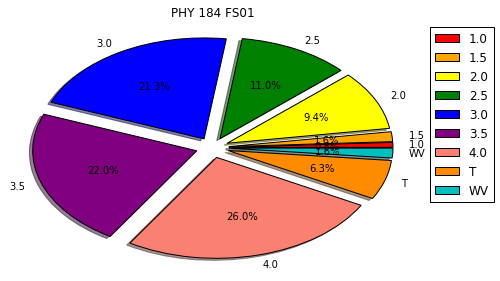

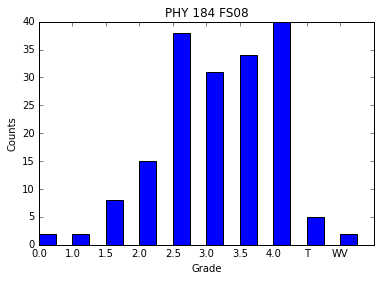

OrderedDict([('0.0', 2), ('1.0', 2), ('1.5', 8), ('2.0', 15), ('2.5', 38), ('3.0', 31), ('3.5', 34), ('4.0', 40), ('T', 5), ('WV', 2)])


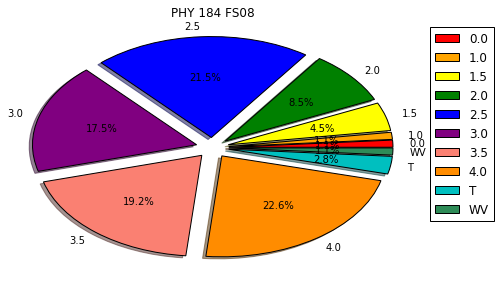

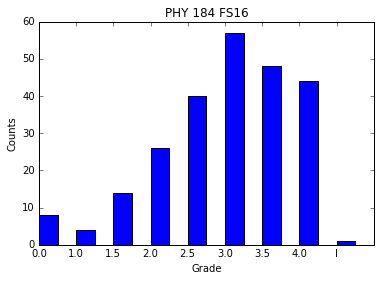

OrderedDict([('0.0', 8), ('1.0', 4), ('1.5', 14), ('2.0', 26), ('2.5', 40), ('3.0', 57), ('3.5', 48), ('4.0', 44), ('I', 1)])


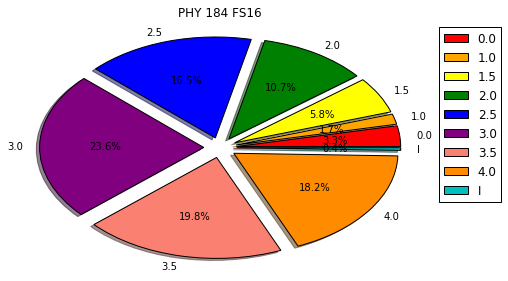

In [10]:
graphing_grades("PHY","FS01","184","PHY 184 FS01")
graphing_grades("PHY","FS08","184","PHY 184 FS08")
graphing_grades("PHY","FS16","184","PHY 184 FS16")